n1: 16, n2: 34


In [6]:
def getk1k2(filename):

    match = re.findall(r'\d+', filename)

    if len(match) >= 2:
        n1, n2 = int(match[-2]), int(match[-1])  # Last two numbers
    return (n1, n2)
   




In [71]:
import numpy as np
import pandas as pd
from scipy.fft import fftn, ifftn, fftshift
import re

import matplotlib.pyplot as plt

def get_data(k1,k2):
    '''
    reads a FRG output text file
    and returns the number of k1 and k2 points used, as well as the data for all three action channels

    '''
  


    df = pd.read_csv("1NN_2_0_" + f"{k1}" +"_"+ f"{k2}" + ".txt", delimiter="\t", header = None, skiprows = 1) 

    r = df.iloc[-1, 0]
    n = r.split()

    tc, sc, mag, cdw, _ = map(float, n)

    orders = [sc, mag, cdw]
    o_max = max(orders)

    dominant = orders.index(o_max)

    


    return (tc, sc, mag, cdw, dominant)

In [72]:
k1s= np.array([4,8,16,24,48])
k2s=([2,4,8,16])

X, Y = np.meshgrid(k2s, k1s)
Tcs = np.zeros((5,4))
dom = np.zeros((5,4))

for i, k1 in enumerate(k1s):
    for j, k2 in enumerate(k2s):
        if k1 == 48 and k2 ==16:
            dom[i][j] = 1
            Tcs[i][j] = 6.18488e-02 
            break

        Tcs[i][j] = get_data(k1,k2)[0]
        dom[i][j] = get_data(k1, k2)[4]
        
      





/tmp/ipykernel_11033/11131647.py:5: UserWarning: linewidths is ignored by contourf
  C = ax.contourf(X, Y, Tcs,  levels = 25, cmap = 'coolwarm', linewidths=1.5)


Text(0, 0.5, 'nk')

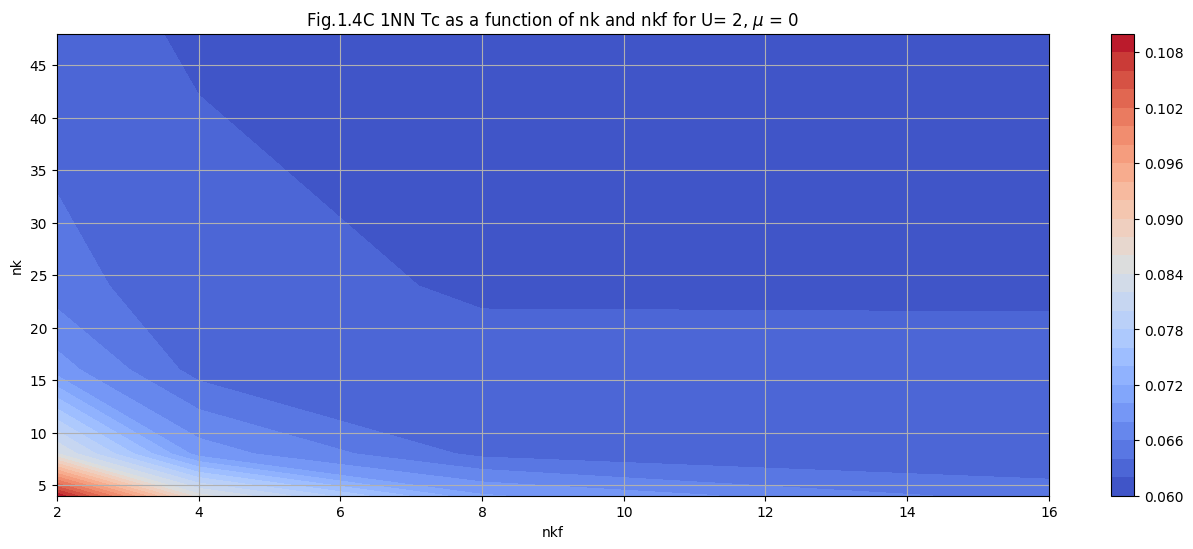

In [73]:
fig, ax = plt.subplots(figsize=(16, 6))

#ax.set_aspect('equal')
ax.grid()
C = ax.contourf(X, Y, Tcs,  levels = 25, cmap = 'coolwarm', linewidths=1.5)
fig.colorbar(C, ax=ax, orientation='vertical')

ax.set_title(f"Fig.1.4C 1NN Tc as a function of nk and nkf for U= 2, $\mu$ = 0")
ax.set_xlabel("nkf")
ax.set_ylabel("nk")

/tmp/ipykernel_11033/1250672909.py:4: UserWarning: linewidths is ignored by contourf
  C = ax.contourf(X, Y, dom,  levels = 50, cmap = 'coolwarm', linewidths=1.5)


Text(0, 0.5, 'nk')

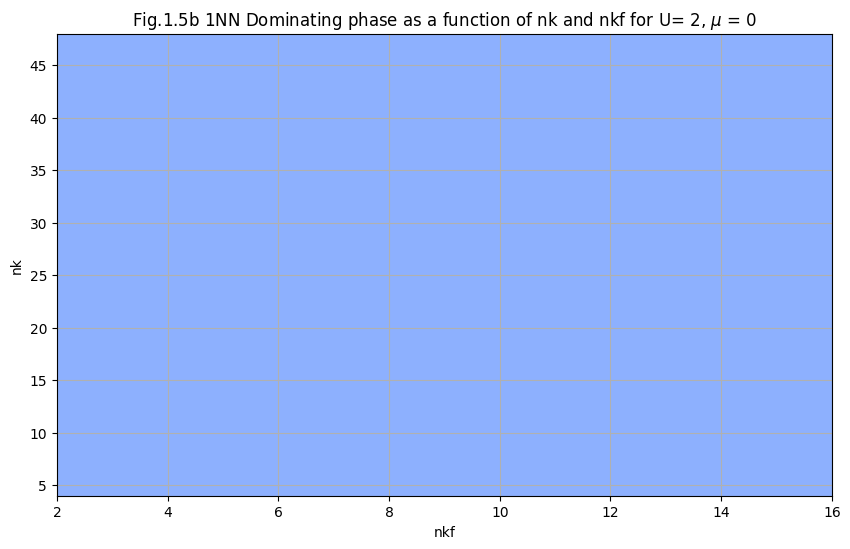

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.grid()
C = ax.contourf(X, Y, dom,  levels = 50, cmap = 'coolwarm', linewidths=1.5)
#fig.colorbar(C, ax=ax, orientation='vertical')

ax.set_title(f"Fig.1.5b 1NN Dominating phase as a function of nk and nkf for U= 2, $\mu$ = 0")
ax.set_xlabel("nkf")
ax.set_ylabel("nk")

In [75]:
print(Tcs)

[[0.109553  0.0847393 0.0702205 0.0649079]
 [0.0841062 0.0690846 0.0634769 0.062607 ]
 [0.0689261 0.0632315 0.0623483 0.0623019]
 [0.0649011 0.0624596 0.0618668 0.061863 ]
 [0.0624471 0.0618526 0.0618488 0.0618488]]
